In [1]:
import pandas as pd
import os
import fnmatch
import nibabel as nib
import numpy as np
from PIL import Image

df = pd.read_csv('/kaggle/input/capstone/cobre_model_group.csv').iloc[:,0:2]
for index, row in df.iterrows():
    df.replace(row[" "],'fmri_'+row[" "].strip()+"_session1_run1.nii",inplace = True)
df.to_csv('/kaggle/working/cobre_model_group_labelled.csv',index = False)

def __makeJPG__(root_path,new_dr = '/kaggle/working/JPEGs'):
  if not os.path.exists(new_dr):
    os.mkdir(new_dr)
  i=0
  for filename in os.listdir(root_path):
    if filename.endswith(('.nii')):
      image = nib.load(os.path.join(root_path,filename))
      image = image.get_fdata()[:,:,:,10:17]
      m,n = image.shape[:2]
      image = np.reshape(image,(m,n,-1))  
      for i in range(image.shape[2]):
        slice_2D = image[:,:,i]
        slice_2D = slice_2D.astype(np.uint8)
        slice_2D = np.repeat(slice_2D[...,np.newaxis],3,-1)
        jpeg_image = Image.fromarray(slice_2D)
        jpeg_image.save(f'{new_dr}/{filename}_Slice_{i}.jpg')
    
if __name__ == '__main__':
    __makeJPG__(root_path='/kaggle/input/capstone')

import pandas as pd
df = pd.read_csv('/kaggle/working/cobre_model_group_labelled.csv').iloc[:,0:2]
df.rename(columns = {' ':'Name'}, 
            inplace = True)
new_df = pd.DataFrame(columns = ['Name', 'sz'])
print('Labelling Images')
for filename in os.listdir('/kaggle/working/JPEGs'):
    name = filename.split('.')[0]+'.nii'
    prediction = pd.to_numeric(df.loc[(df['Name'] == name ),'sz '])
    new_df = new_df.append({'Name' : filename, 'sz' : prediction.to_numpy()[0]},
        ignore_index = True) 
new_df.to_csv('/kaggle/working/cobre_model_group_labelled.csv',index = False)
print('Labelling Complete')
print("======================================================")


pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) o

Labelling Images
Labelling Complete


In [2]:
import fnmatch
dir_path = r'/kaggle/working/JPEGs'
count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
print('\nFile Count:', count)


File Count: 53144


In [3]:
import tensorflow as tf
import numpy as np
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the custom cats dataset
img_dir = '/kaggle/working/JPEGs'
img_paths = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.jpg')]
x = np.zeros((len(img_paths), 53, 64, 3))
y = np.zeros((len(img_paths), 1))

for i, img_path in enumerate(img_paths):
  img = cv2.imread(img_path)
  x[i] = img
  if 'szxxx' in img_path:
    y[i] = 1

# Preprocess the data
x = x.astype('float32')

# Convert the labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, 2)

# Create a data generator for the training data
def data_generator(x, y, batch_size):
  while True:
    for i in range(0, len(x), batch_size):
      yield x[i:i + batch_size], y[i:i + batch_size]

# Split the data into training and validation sets
x_train, x_val = x[:int(0.7 * len(x))], x[int(0.7 * len(x)):]
y_train, y_val = y[:int(0.7 * len(y))], y[int(0.7 * len(y)):]


In [4]:

# Build the CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(53, 64,3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model using the data generator
batch_size = 32
train_gen = data_generator(x_train, y_train, batch_size)
val_gen = data_generator(x_val, y_val, batch_size)
history = model.fit_generator(train_gen, epochs=50, steps_per_epoch=len(x_train) // batch_size, validation_data=val_gen, validation_steps=len(x_val) // batch_size)

print('Evaluate the model on the validation set')
loss, accuracy = model.evaluate(x_val, y_val, batch_size=batch_size)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

2023-02-10 07:51:45.801841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 07:51:45.932908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 07:51:45.933777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 07:51:45.936177: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 51, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 49, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 28, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 28, 128)       512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 26, 128)       1

2023-02-10 07:51:48.931806: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-10 07:51:50.617564: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1162/1162 [==============================] - 26s 16ms/step - loss: 0.6650 - accuracy: 0.6055 - val_loss: 0.7001 - val_accuracy: 0.6517
Epoch 2/50
1162/1162 [==============================] - 21s 18ms/step - loss: 0.4298 - accuracy: 0.7933 - val_loss: 0.3668 - val_accuracy: 0.8404
Epoch 3/50
1162/1162 [==============================] - 18s 15ms/step - loss: 0.1743 - accuracy: 0.9283 - val_loss: 0.2338 - val_accuracy: 0.9090
Epoch 4/50
1162/1162 [==============================] - 18s 16ms/step - loss: 0.0809 - accuracy: 0.9691 - val_loss: 0.1023 - val_accuracy: 0.9635
Epoch 5/50
1162/1162 [==============================] - 18s 15ms/step - loss: 0.0570 - accuracy: 0.9779 - val_loss: 0.1649 - val_accuracy: 0.9443
Epoch 6/50
1162/1162 [==============================] - 18s 15ms/step - loss: 0.0436 - accuracy: 0.9841 - val_loss: 0.2809 - val_accuracy: 0.9133
Epoch 7/50
1162/1162 [==============================] - 18s 15ms/step - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.0490 - val_accura

2023-02-10 08:07:11.645841: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 648984576 exceeds 10% of free system memory.
2023-02-10 08:07:12.374270: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 648984576 exceeds 10% of free system memory.


499/499 [==============================] - 4s 7ms/step - loss: 0.0149 - accuracy: 0.9948
Validation loss: 0.014931958168745041
Validation accuracy: 0.9947943091392517


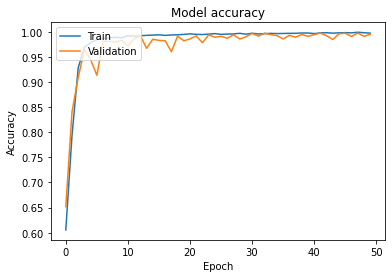

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


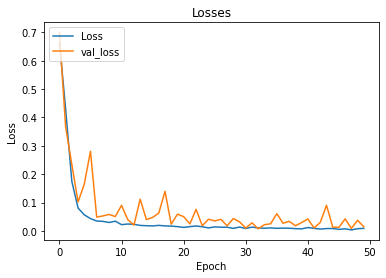

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'val_loss'], loc='upper left')
plt.show()


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

